In [ ]:
# Импортируем библиотеку для работы с графами и не только
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from statistics import mean
from scipy.io import mmread
import pydot
import pip
from tqdm import tqdm
import seaborn as sns
import nbconvert


In [ ]:
# ---------------------------
# Задание 1
 
 G = nx.read_edgelist('CA-AstroPh.txt', create_using=nx.Graph(nodetype = int))

In [ ]:
nodes = G.number_of_nodes()
print('Количество вершин:', G.number_of_nodes()) # выводим количество вершин
print('Количество рёбер:', G.number_of_edges()) # выводим количество ребер
print('Плотность: ', G.number_of_edges() / ((nodes * (nodes - 1)) / 2))

Количество вершин: 18772
Количество рёбер: 198110
Плотность:  0.0011244455715955115


In [ ]:
nwcc = nx.number_connected_components(G)
print( "\nЧисло компонент слабой связности: ", nwcc)

max_connected_components = max(sorted(nx.connected_components(G), key=len, reverse=True)) # !
#print(max_connected_components)
print("Доля вершин: ", len(max_connected_components) / len(G.nodes()))



# for i in max_connected_components: 
#     G_max_component.add_node(i) # Добавляем в G_max_component вершины

# #for (i, j) in list(G.edges): 
#     #if i in max_connected_components and j in max_connected_components:
#         #G_max_component.add_edge(i, j) # Добавляем в G_max_component ребра

# Bigwcc_len = len(list(G_max_component))
# counter_edgeses = 0
# for i in G.edges:
#     a = i[0]
#     b = i[1]
#     if a in list(G_max_component) and b in list(G_max_component):
#         counter_edgeses+=1

# print("Число вершин, принадлежащих наибольшей компоненте слабой связности:", Bigwcc_len)
# #print("Число ребер, принадлежащих наибольшей компоненте слабой связности:", counter_edgeses)
# print("Доля вершин:", Bigwcc_len/len(G.nodes))
# #print("Доля ребер:", counter_edgeses/len(G.edges))G_node_degrees = [degree[1] for degree in G.degree()]


Число компонент слабой связности:  290
Доля вершин:  0.9537076496910292


In [ ]:
# ---------------------------
# Задание 2

G_node_degrees = [degree[1] for degree in G.degree()]

print(f'Минимальная степень вершины: {np.min(G_node_degrees)}', 
      f'Максимальная степень вершины: {np.max(G_node_degrees)}',  
      f'Средняя степень вершины: {np.mean(G_node_degrees)}', sep='\n')

sr_st = np.mean(G_node_degrees)

#print(G.degree) # выводим список из пар (имя_вершины, кол-во рёбер исходящих из нее)
ls = G.degree # завели этот список в переменную для дальнейшей работы

# далее считаем количество вершин, у которых степень больше среднего

count = 0 # до начала работы счётчик = 0
for i in ls: # цикл, где каждый раз i принимает значение (т.е. пару) из списка ls
    if i[1] > sr_st: # если её степень, а она на втором месте в паре, больше среднего, то...
        count = count + 1 # то счетчик увеличиваем на один
print('Число вершин степени, превышающей среднюю:', count) 

Минимальная степень вершины: 1
Максимальная степень вершины: 504
Средняя степень вершины: 21.10696782441935
Число вершин степени, превышающей среднюю: 5594


In [ ]:
# ---------------------------
# Задание 3

G2 = G.subgraph(max(nx.connected_components(G), key=len)) # наибольшая компонента связности #!
from random import randint
def random_nodes(main_graph, num_nodes):
  G2_num = nx.Graph()
  l = list(main_graph.nodes())
  for j in range(num_nodes):
    i = randint(0, main_graph.number_of_nodes()-1-j)
    a = l.pop(i)
    G2_num.add_node(a)
  return G2_num

G2_new = random_nodes(G2, 500)

#print(G2_new)
#print(G2_new.number_of_nodes())


# print('Радиус :', nx.radius(G2)) 
# print('Диаметр :', nx.diameter(G2))

# degree_free = np.array(nx.degree_histogram(G))  # создаем массив, по которому будет строиться гистограмму
# plt.stem(degree_free) 
# plt.xlabel('Степени') 
# plt.ylabel('Количество вершин')
# plt.show()

Graph with 500 nodes and 0 edges
500


In [ ]:
#print(G2.number_of_nodes())
ls = list(G2_new.nodes)
for i in range(len(ls)-1): # пробегаемся по первому элементу в паре, от 0 места до предпоследнего
   for j in range(i+1, len(ls)):
     for el in G2.edges(ls[i]):
       if ls[j] == el[1]:
         G2_new.add_edge(ls[i], ls[j])

       #print(G2.edges(ls[i]))


17903


Graph with 500 nodes and 119 edges
[1 6 2 4 6 3 5 5 5 3 2 4 6 3 1 6 5 4 6 1 1 2 5 3 1 3 2 1 1 4 2 2 2 3 2 1 1
 2 1 1 2 1 1 2 1 1 2 2 1 1 2 1 1 1 1 1 1 1 5 1 3 5 2 4 4 4 2 1 3 5 1 1 1 1
 3 1 2 6 4 3 3 3 2 1 5 4 2 2 1 2 1 1 4 6 3 5 5 5 3 2 4 6 3 2 3 1 1 3 4 2 4
 5 4 3 5 2 4 1 4 2 1 3 2 3 1 1 1 2 4 2 2 3 3 1 2 2 1 3 1 1 2 1 2 1 1 1 1 2
 1 1 1 2 2 1 1 3 1 1 2 2 7 6 5 7 2 2 3 6 4 1 4 1 3 3 3 3 2 2 4 3 3 1 2 5 4
 2 3 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 3 2 2 5 7 4 1 3 1 3 4 6 3 2 2 2 2
 3 2 1 2 2 3 5 2 1 1 1 2 5 7 4 1 3 1 1 1 2 1 4 2 1 2 1 2 2 2 2 1 1 3 2 2 4
 3 1 3 1 1 1 1 1 2 2 2 1 4 3 1 2 4 2 2 1 3 3 6 4 1 2 2 4 3 1 1 1 2 1 2 1 2
 4 5 3 2 3 1 3 1 3 3 3 1 4 1 1 1 2 1 1 3 5 2 1 1 1 2 1 2 4 2 2]
5.0


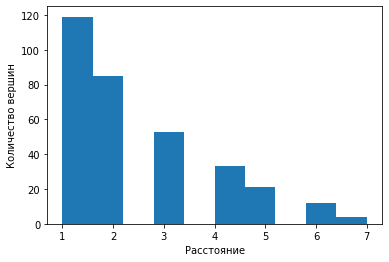

In [ ]:
import pandas as pd
#print(G2_new)
sp = nx.all_pairs_shortest_path_length(G2_new) # собираем в неведомый контейнер самые коротки расстояния (= расстояния) для всевозможных пар
ls2 = list() # список, где будем хранить значения расстояний, пока пустой
a = dict(sp) # из неведомого контейнера делаем словарик, с ним удобнее работать
#print(a)
ls_nodes = list(G2_new.nodes) # получаем список всех вершин в нашем графе
#print(ls_nodes)
for i in range(len(ls_nodes)-1): # пробегаемся по первому элементу в паре, от 0 места до предпоследнего
   for j in range(i+1, len(ls_nodes)): # по второму, от следующего после первого и до последнего
     if ls_nodes[j] in a[ls_nodes[i]]: # а есть ли вообще такая пара? Можно ли прийти из первой вершины до второй? Есть ли расстояние?
       ls2.append(a[ls_nodes[i]][ls_nodes[j]]) # ну если есть, то добавим её в список
#print(ls2) 
main1 = np.array(ls2) # теперь нужен не просто список, а вектор. Там есть метод для подсчета процентиля
#print(main1)
#print(main1)
main2 = np.percentile(main1, 90) # считаем процентиль
print(main2)
plt.hist(main1) # придаем вид для гистограммы
plt.xlabel('Расстояние') # подписываем оси
plt.ylabel('Количество вершин')
plt.show() # выводим на экран



[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] <class 'list'>
[0, 26844, 126576, 549786, 1808990, 3828662, 4708218, 3467244, 1714424, 681594, 254116, 86492, 24664, 5710, 1172, 234, 66, 14]


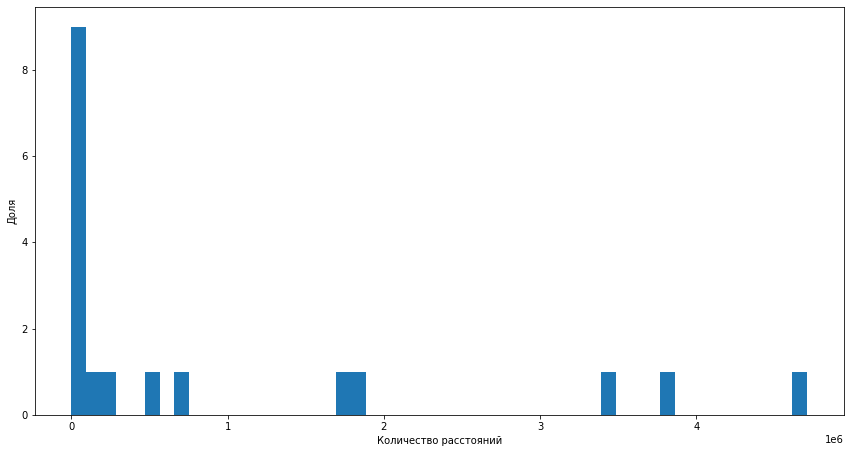

90 процентов всех расстояний в выборке равняется 3575669.4


In [ ]:
# ---------------------------
# Задание 4

G = nx.Graph(G)

# Число треугольников в сети
edges = list(G.edges())
counter_triangles = 0
for i in G.nodes():
    neighbors_G = list(G.neighbors(i))
    for j in neighbors_G:
        for k in list(G.neighbors(j)):
            if k in neighbors_G:
                counter_triangles += 1
print("Число треугольников в сети:", counter_triangles / 6)

local_clust_k = sorted(nx.clustering(G).items())

average_clust_k = nx.average_clustering(G)
print("Средний кластерный коэффииент:", average_clust_k)

# Количество соседей у вершины
neighbors_counts_list = [0] * len(G.nodes())
   
perem = dict(sorted(enumerate(list(G.nodes()))))
    
for i in dict(sorted(enumerate(list(G.nodes())))):
    neighbors_counts_list[i - 1] = len(list(G.neighbors(perem[i])))
# print("Количество соседей:", neighbors_counts_list)

# Глобальный кластерный коэффициент
numerator = 0
denominator = 0
combin_neighbors = []

for i in dict(sorted(enumerate(list(G.nodes())))): # число сочетаний из количества соседей у вершин по 2
    combin_neighbors = len(list(itertools.combinations(list(range(neighbors_counts_list[i - 1])), 2)))
    for j in neighbors_counts_list:
        numerator += combin_neighbors * local_clust_k[i - 1][1]
        denominator += combin_neighbors

global_clust_k = numerator/denominator
print("Глобальный кластерный коэфициент:", global_clust_k)

Число треугольников в сети: 1352994.0
Средний кластерный коэффииент: 0.6305932411707943
Глобальный кластерный коэфициент: 0.6205854507014229


In [1]:
# ---------------------------
# Задание 5 и 6


from math import log
import matplotlib.pyplot as plt
G = nx.DiGraph(G)

degree_dict = dict(G.in_degree())
# print(degree_dict)
degree_list = set(degree_dict.values())
# print(degree_list)

def plot_degree_dist(G):
    degrees = sorted([G.in_degree(n) for n in G.nodes()])
    #print(degrees)
    # print('Количество степеней =', len(degrees)) #Проверка что у всех вершин посмотрели степени
    # print('Минимальная степень узла =', min(degrees))
    # print('Максимальная степень узла =', max(degrees))
    # print('Средняя степень узла =', round(mean(degrees), 3))
    y = [degrees.count(i)/len(degrees) for i in degrees]
    df = pd.DataFrame({'Степень': degrees, 'Частота': y})

    #print(df)
    
    fig = plt.figure()
    fig.set_size_inches(12.5, 7.5, forward = True)
    fig.suptitle('Плотность распределения степеней вершин')
    ax1 = df['Степень'].plot(kind='hist', density=True, bins=70)
    ax1.grid(True)
    ax1.set_xlabel("Степень вершины")
    ax1.set_ylabel("Частота")
    ax1.plot(style='o')

    fig_log = plt.figure()
    fig_log.set_size_inches(12.5, 7.5, forward = True)
    fig_log.suptitle('Плотность распределения степеней вершин в log-log шкалах')
    plt.grid(True)
    plt.xlabel("Степень вершины")
    plt.ylabel("Частота")

    x = list(degrees)
    xy = [x[i]*y[i] for i in range(len(x))]
    x2 = [i**2 for i in x]
    n = len(x)
    a = (n * sum(xy) - sum(x)*sum(y)) / (n * sum(x2) - (sum(x)**2))
    #print(a)
    b = (sum(y) - a*sum(x)) / n
    #print(b)
    df['МНК'] = a*df['Степень'] + b
    #print(df)
    plt.plot(df['Степень'], df['МНК'], color='red')
    plt.scatter(df['Степень'], df['Частота'])
    plt.yscale("log")
    plt.xscale("log")

    fig_log = plt.figure()
    fig_log.set_size_inches(12.5, 7.5, forward = True)
    fig_log.suptitle('Плотность распределения степеней вершин в log-log шкалах')
    plt.grid(True)
    plt.plot(df['Степень'], df['МНК'], color='red')
    plt.plot(df['Степень'], df['Частота'])
    plt.xlabel("Степень вершины")
    plt.ylabel("Частота")
    plt.ylim(0, 0.1)



    # mx1 = sum(degrees)/len(degrees)
    # ax1 = np.dot(np.array(degrees).T, np.array(degrees))/len(degrees)
    # y1 = [degrees.count(i)/len(degrees) for i in degrees]
    # my1 = sum(y1)/len(degrees)
    # ay1 = np.dot(np.array(degrees).T, np.array(y1))/len(degrees)
    # kk1 = (ay1 - mx1*my1)/(ax1-mx1**2)
    # bb1 = my1 - kk1*mx1
    # ff1 = np.array([kk1*z+bb1 for z in range(len(degrees))])
    # plt.plot(ff1, c='red')

    # ax1 = s.plot(kind='hist', density=True, bins=70)
    # ax1.grid(True)
    # ax1.set_xlabel("Степень вершины")
    # ax1.set_ylabel("Частота")
    # ax1.plot(style='o')
    
    # fig_log = plt.figure()
    # fig_log.set_size_inches(12.5, 7.5, forward = True)
    # fig_log.suptitle('Плотность распределения степеней вершин в log-log шкалах')

    # a = (n * sum(xy) - sum(x)*sum(y)) / (n * sum(x2) - sum(x2))
    # b = (sum(y) - a*sum(x)) / n
    # g = [a*x[i] + b for i in range(len(x))]
    # # mx = sum(degrees)/len(degrees)
    # # ax = np.dot(np.array(degrees).T, np.array(degrees))/len(degrees)
    # # print(y)
    # # my = sum(y)/len(degrees)
    # # ay = np.dot(np.array(degrees).T, np.array(y))/len(degrees)
    # # kk = (ay - mx*my)/(ax-mx**2)
    # # bb = my - kk*mx
    # # ff = np.array([kk*z+bb for z in range(len(degrees))])
    # plt.plot(g, c='red')
    # plt.ylim()

    # ax2 = s.plot(kind='scatter', style='o', density=True)
    # ax2.grid(True)
    # ax2.set_xlabel("Степень вершины")
    # ax2.set_ylabel("Частота")

plot_degree_dist(G)

NameError: name 'nx' is not defined